# import modules

In [153]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# loading dataset

In [137]:
dt = pd.read_csv('Irisnew.csv')
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [138]:
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [139]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Preprocessing dataset

In [140]:
dt.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [141]:
dt.sum()

Id                                                           11325
SepalLengthCm                                                876.5
SepalWidthCm                                                 458.1
PetalLengthCm                                                563.8
PetalWidthCm                                                 179.8
Species          Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

# Analysis

<Axes: >

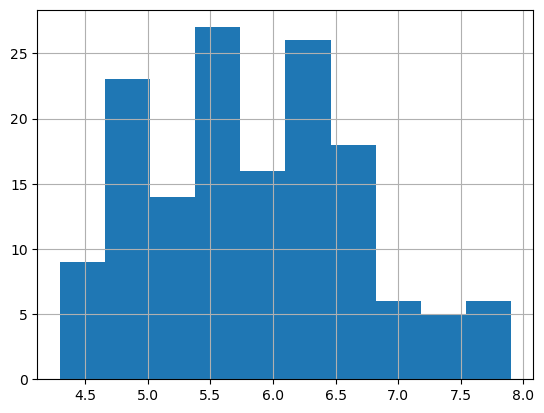

In [142]:
dt['SepalLengthCm'].hist()

<Axes: >

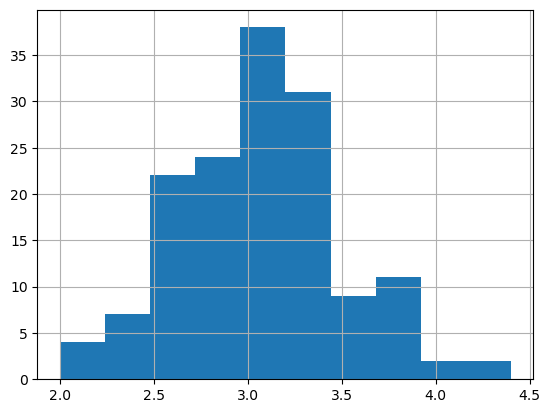

In [143]:
dt['SepalWidthCm'].hist()

In [144]:
dt.corr()

C:\Users\apple\AppData\Local\Temp\ipykernel_11408\1921767823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Train and Test

In [145]:
label_encoder = LabelEncoder()
dt['species_encoded'] = label_encoder.fit_transform(dt['Species'])

x = dt.drop(columns=['Species', 'species_encoded'])
y = dt['species_encoded']

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 51)

In [147]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\apple\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Acuuracy

In [148]:
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [155]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(' Mean Squared Error:', mse)

 Mean Squared Error: 0.0


# Tensor flow 

In [156]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [157]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

In [158]:
y_pred_nn = model.predict(x_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print('Neural Network Mean Squared Error:',mse_nn)

1/1 [==============================] - 0s 78ms/step
Neural Network Mean Squared Error: 0.10475093847771634


In [161]:
tf_accuracy = model.evaluate(x_test, y_test)
print("TensorFlow Neural Network Accuracy:", tf_accuracy)

1/1 [==============================] - 0s 38ms/step - loss: 0.1048
TensorFlow Neural Network Accuracy: 0.10475093871355057
